###1. Import libraries

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [14]:
# Set working directory(Using your pc)
#os.chdir("C:/Users/Chris/Desktop/bike_accident")

In [15]:
# # Set working directory(Using your google drive)
# from google.colab import drive
# drive.mount('/content/drive')

###2. Load Dataset

In [16]:
# Load datasets
bike_accidents = pd.read_csv(r"C:\Users\Chris\Desktop\Machine_leaarning\training_materials\Machine_Learning\Datasets\Accidents.csv")

In [17]:
bikers = pd.read_csv(r"C:\Users\Chris\Desktop\Machine_leaarning\training_materials\Machine_Learning\Datasets\Bikers.csv")

In [18]:
# LEts view dataset
bike_accidents.head()

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions
0,197901A1SEE71,2,1,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit
1,197901A2JDW40,1,1,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight
2,197901A4IJV90,2,1,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight
3,197901A4NIE33,2,1,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight
4,197901A4SKO47,2,1,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit


In [19]:
bikers.head()

,Accident_Index,Gender,Severity,Age_Grp
0,197901A1SEE71,Male,Serious,36 to 45
1,197901A2JDW40,Male,Slight,46 to 55
2,197901A4IJV90,Male,Slight,46 to 55
3,197901A4NIE33,Male,Slight,36 to 45
4,197901A4SKO47,Male,Slight,46 to 55


###3. Carry Out Preliminary Data Analysis

In [20]:
#LEts check the shape
print(f"dimension of bike_accidents data:  {bike_accidents.shape}")
print(f"dimension of bikers data: {bikers.shape}")

dimension of bike_accidents data:  (827861, 11)
dimension of bikers data: (827871, 4)


In [21]:
print(bike_accidents.info())
print("____________________________________________________")
print(bikers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827861 entries, 0 to 827860
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Accident_Index        827861 non-null  object 
 1   Number_of_Vehicles    827861 non-null  int64  
 2   Number_of_Casualties  827861 non-null  int64  
 3   Date                  827861 non-null  object 
 4   Time                  827861 non-null  object 
 5   Speed_limit           827861 non-null  float64
 6   Road_conditions       827861 non-null  object 
 7   Weather_conditions    827861 non-null  object 
 8   Day                   827861 non-null  object 
 9   Road_type             827861 non-null  object 
 10  Light_conditions      827861 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 69.5+ MB
None
____________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827871 entries, 0 to 827870
Data columns (

###4. Carry Out Data Cleaning

In [22]:
# LEts chexck for missing values
print(bike_accidents.isnull().sum())
print("_________________________________")
print(bikers.isnull().sum())

Accident_Index          0
Number_of_Vehicles      0
Number_of_Casualties    0
Date                    0
Time                    0
Speed_limit             0
Road_conditions         0
Weather_conditions      0
Day                     0
Road_type               0
Light_conditions        0
dtype: int64
_________________________________
Accident_Index    0
Gender            0
Severity          0
Age_Grp           0
dtype: int64


In [23]:
# LEts go through the column names for inconsistent formating
print(bike_accidents.columns)
print("_________________________________")
print(bikers.columns)

Index(['Accident_Index', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date',
       'Time', 'Speed_limit', 'Road_conditions', 'Weather_conditions', 'Day',
       'Road_type', 'Light_conditions'],
      dtype='object')
_________________________________
Index(['Accident_Index', 'Gender', 'Severity', 'Age_Grp'], dtype='object')


In [24]:
# LEts work on the column names
# Convert column names to title case and replace spaces with underscores
bike_accidents.columns = bike_accidents.columns.str.title().str.replace(" ", "_")
bikers.columns = bikers.columns.str.title().str.replace(" ", "_")

In [25]:
# LEts have the Summary statistics
print(bike_accidents.describe())
print("____________________________________________________")
print(bikers.describe())


       Number_Of_Vehicles  Number_Of_Casualties    Speed_Limit
count       827861.000000         827861.000000  827861.000000
mean             1.986178              1.047212      33.340934
std              0.311600              0.253509       9.278129
min              1.000000              1.000000       0.000000
25%              2.000000              1.000000      30.000000
50%              2.000000              1.000000      30.000000
75%              2.000000              1.000000      30.000000
max             13.000000             60.000000     660.000000
____________________________________________________
       Accident_Index  Gender Severity   Age_Grp
count          827871  827871   827871    827871
unique         827871       3        3         9
top     2018983133818    Male   Slight  11 to 15
freq                1  660031   681578    169945


###5. Lets Explore

####A. Key Metrics and Summaries

######1. Key Metrics and Summaries for bike_accident data

In [30]:
# For bike_accidents
bike_accidents.columns

Index(['Accident_Index', 'Number_Of_Vehicles', 'Number_Of_Casualties', 'Date',
       'Time', 'Speed_Limit', 'Road_Conditions', 'Weather_Conditions', 'Day',
       'Road_Type', 'Light_Conditions'],
      dtype='object')

In [31]:
# Total numbers of unique accident indexes
bike_accidents["Accident_Index"].nunique()

827861

In [33]:
# Total numbers of vehicles
Total_bikes = bike_accidents["Number_Of_Vehicles"].sum()
print(f"Total numbers of bikes: {Total_bikes}")

Total numbers of bikes: 1644279


In [34]:
#Average numbers of Bikes involved in accidents per day
Total_days = bike_accidents["Date"].nunique()
Average_vehicles_per_day = Total_bikes / Total_days
print(f"Average numbers of Bikes involved in accidents per day: {round(Average_vehicles_per_day)}")

Average numbers of Bikes involved in accidents per day: 113


In [36]:
#Total numbers of casualties
Total_casualties = bike_accidents["Number_Of_Casualties"].sum()
print(f"Total numbers of casualties: {Total_casualties}")

Total numbers of casualties: 866946


In [ ]:
#Total numbers of casualties per day
Total_casualties_per_day = Total_casualties / Total_days
print(f"Total numbers of casualties per day: {round(Total_casualties_per_day)}")

Total numbers of casualties per day: 59


In [ ]:
# Days that accident occurs the most
days_that_accidents_occur_most=bike_accidents["Day"].value_counts().idxmax()
print(f"Days that accident occurs the most: {days_that_accidents_occur_most}")

Days that accident occurs the most: Wednesday


In [ ]:
# What time of the day does accident occur the most
bike_accidents["Time"] = pd.to_datetime(bike_accidents["Time"], format="%H:%M") # LEts conver it to pandas format first
bike_accidents["Hour"] = bike_accidents["Time"].dt.hour
hour_that_accidents_occur_most = bike_accidents["Hour"].value_counts().idxmax()
print(f"What time of the day does accident occur the most: {hour_that_accidents_occur_most}:00pm")

What time of the day does accident occur the most: 17:00pm


In [ ]:
# Lets view the road conditions and how frequesnt accidents occur on them
road_conditions = bike_accidents["Road_conditions"].value_counts()
print(road_conditions)

Road_conditions
Dry             633936
Wet             184279
Frost             6020
Snow              1710
Missing Data      1648
Flood              268
Name: count, dtype: int64


In [ ]:
# In which road condition do accidents occur the most
road_condition_that_accidents_occur_most = bike_accidents["Road_conditions"].value_counts().idxmax()
print(f"In which road condition do accidents occur the most: {road_condition_that_accidents_occur_most}")

In which road condition do accidents occur the most: Dry


In [ ]:
# Lets check for light condition
light_conditions = bike_accidents["Light_conditions"].value_counts()
print(light_conditions)

Light_conditions
Daylight               660657
Darkness lights lit    142039
Darkness no lights      25165
Name: count, dtype: int64


In [ ]:
# In which light condition do accidents occur the most
light_condition_that_accidents_occur_most = bike_accidents["Light_conditions"].value_counts().idxmax()
print(f"In which light condition do accidents occur the most: {light_condition_that_accidents_occur_most}")

In which light condition do accidents occur the most: Daylight


In [ ]:
# maximum speed limit
max_speed_limit = bike_accidents["Speed_limit"].max()
print(f"Maximum speed limit: {max_speed_limit}")

Maximum speed limit: 660.0


In [ ]:
# Average speed limits of accidents reported
Average_speed_limit = bike_accidents["Speed_limit"].mean()
print(f"Average speed limit: {round(Average_speed_limit)}")

Average speed limit: 33


In [ ]:
# Lets view the road conditions and how frequesnt accidents occur on them
weather_conditions = bike_accidents["Weather_conditions"].value_counts()
print(weather_conditions)

Weather_conditions
Clear              683162
Rain                82007
Unknown             24081
Clear and windy     11891
Other               11820
Rain and windy       8808
Fog                  3369
Snow                 2086
Snow and windy        483
Missing data          154
Name: count, dtype: int64


In [ ]:
# In which weather condition do accidents occur the most
weather_condition_that_accidents_occur_most = bike_accidents["Weather_conditions"].value_counts().idxmax()
print(f"In which weather condition do accidents occur the most: {weather_condition_that_accidents_occur_most}")

In which weather condition do accidents occur the most: Clear


######2. Key Metrics and Summaries for bikers data

In [ ]:
bikers.columns

Index(['Accident_Index', 'Gender', 'Severity', 'Age_Grp'], dtype='object')

In [ ]:
# Numbers per gender
bikers["Gender"].value_counts()

Gender
Male      660031
Female    167721
Other        119
Name: count, dtype: int64

In [ ]:
# Level of Severity of accident
bikers["Severity"].value_counts(ascending = True)

Severity
Fatal        6730
Serious    139563
Slight     681578
Name: count, dtype: int64

In [ ]:
# Age group with the most accident
bikers["Age_Grp"].value_counts(ascending = False)

Age_Grp
11 to 15    169945
26 to 35    145081
16 to 20    122604
36 to 45    103774
21 to 25     87292
46 to 55     73578
6 to 10      68021
56 to 65     41913
66 to 75     15663
Name: count, dtype: int64

#### B. Exploration For Detailed Insights

Here, I am looking for patterns, relationships(Univariate, bivariate and multivariate analysis), trends, causation and answering questions.
This sections has no special arrangement...I am just exploring and experimenting to see if Ican find something meainingful

In [ ]:
# lets view our columns again
bike_accidents.columns

Index(['Accident_Index', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date',
       'Time', 'Speed_limit', 'Road_conditions', 'Weather_conditions', 'Day',
       'Road_type', 'Light_conditions', 'Hour'],
      dtype='object')

In [ ]:
# Lets filter for days with both 60 casualties and speed limit of 660
filtered_casualty_and_speed_limit = bike_accidents.loc[(bike_accidents['Number_of_Casualties'] == 60) | (bike_accidents['Speed_limit'] == 660)]

filtered_casualty_and_speed_limit

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Hour
44320,198061C412800,3,60,1980-01-12,1900-01-01 08:55:00,30.0,Dry,Clear,Monday,Single carriageway,Daylight,8
296465,199032C064990,2,1,1990-10-08,1900-01-01 18:50:00,660.0,Dry,Clear,Thursday,Unknown,Daylight,18


######1. Visual Of Accident Associated With Road Condition

In [ ]:
# Accidents associated with road condition in percentage
road_condition_counts = bike_accidents['Road_conditions'].value_counts(dropna=True)
road_condition_percent = road_condition_counts / road_condition_counts.sum()
road_condition_percent

Road_conditions
Dry             0.765752
Wet             0.222597
Frost           0.007272
Snow            0.002066
Missing Data    0.001991
Flood           0.000324
Name: count, dtype: float64

In [ ]:
# Convert to pandas daataframe
road_condition_df = pd.DataFrame({"Road_conditions": road_condition_counts.index,
                                  "Counts": road_condition_counts.values,
                                  "Percent": road_condition_percent.values})
road_condition_df

,Road_conditions,Counts,Percent
0,Dry,633936,0.765752
1,Wet,184279,0.222597
2,Frost,6020,0.007272
3,Snow,1710,0.002066
4,Missing Data,1648,0.001991
5,Flood,268,0.000324


C:\Users\Chris\AppData\Local\Temp\ipykernel_22068\3153701016.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=road_condition_df['Road_conditions'], y=road_condition_df['Percent'], palette=palette)


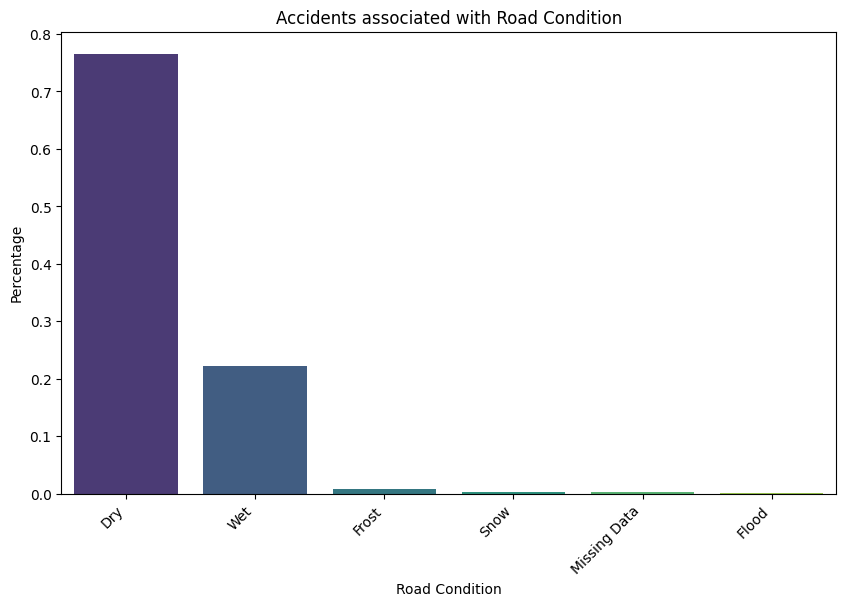

In [ ]:
# Let Visualize it

palette = "viridis"

plt.figure(figsize=(10, 6))
sns.barplot(x=road_condition_df['Road_conditions'], y=road_condition_df['Percent'], palette=palette)
plt.ylabel("Percentage")
plt.xlabel("Road Condition")
plt.title("Accidents associated with Road Condition")
plt.xticks(rotation=45, ha='right')
plt.show()

######2. Visual Of Accident Associated With Road Type

In [ ]:
# Accidents associated with road type
road_type_counts = bike_accidents['Road_type'].value_counts(dropna=True)
road_type_percent = road_type_counts / road_type_counts.sum()

road_type_df = pd.DataFrame({"Road_Type": road_type_counts.index,
                             "Counts": road_type_counts.values,
                             "Percent": road_type_percent.values})

print(road_type_df)

            Road_Type  Counts   Percent
0  Single carriageway  656703  0.793253
1          Roundabout   75066  0.090675
2    Dual carriageway   59037  0.071313
3             Unknown   30647  0.037019
4       One way sreet    5562  0.006719
5           Slip road     846  0.001022


In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=road_type_df['Percent'], y=road_type_df['Road_Type'], palette="coolwarm")
plt.ylabel("Percent")
plt.xlabel("Road Type")
plt.title("Accidents associated with Road Type")
plt.xticks(rotation=45, ha='right')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# Accidents associated with weather conditions
weather_counts = bike_accidents['Weather_conditions'].value_counts(dropna=True)
weather_percent = weather_counts / weather_counts.sum()

weather_df = pd.DataFrame({"Weather_conditions": weather_counts.index,
                           "Counts": weather_counts.values,
                           "Percent": weather_percent.values})
print(weather_df)

NameError: name 'bike_accidents' is not defined

C:\Users\Chris\AppData\Local\Temp\ipykernel_22068\2878383172.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=weather_df['Weather_conditions'], x=weather_df['Percent'], palette="Blues")


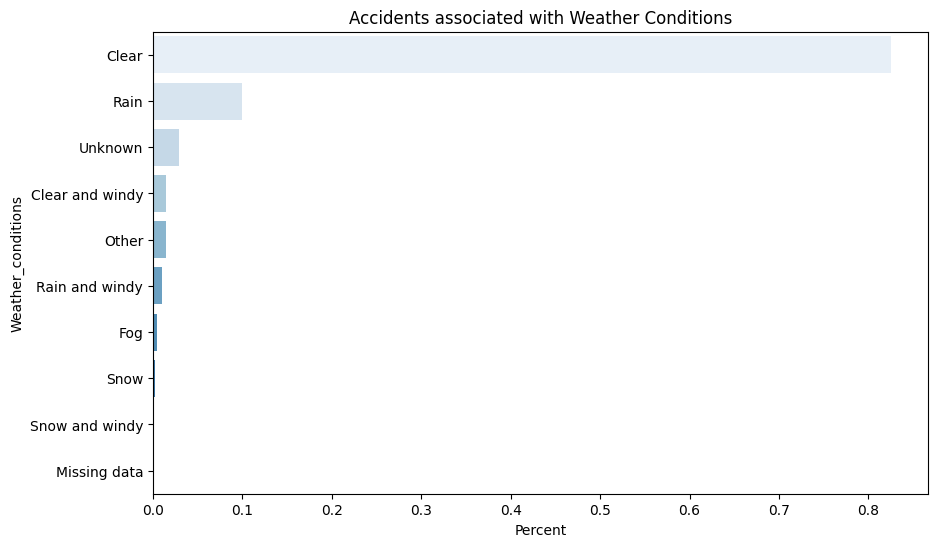

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(y=weather_df['Weather_conditions'], x=weather_df['Percent'], palette="Blues")
plt.xlabel("Percent")
plt.ylabel("Weather_conditions")
plt.title("Accidents associated with Weather Conditions")
plt.show()

C:\Users\Chris\AppData\Local\Temp\ipykernel_22068\156523880.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bike_accidents, x='Weather_conditions', palette='viridis')


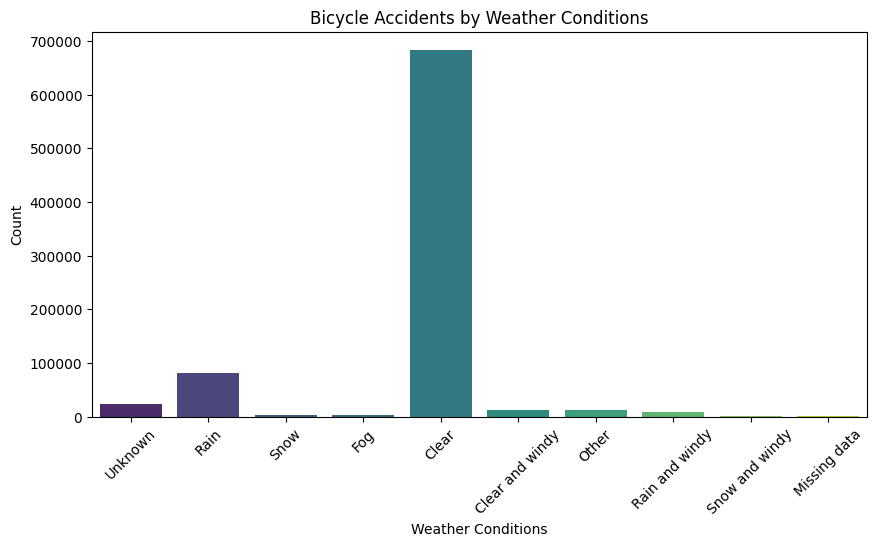

In [ ]:
# Weather Condition Plot
plt.figure(figsize=(10, 5))
sns.countplot(data=bike_accidents, x='Weather_conditions', palette='viridis')
plt.title('Bicycle Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
bike_accidents.columns

Index(['Accident_Index', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date',
       'Time', 'Speed_limit', 'Road_conditions', 'Weather_conditions', 'Day',
       'Road_type', 'Light_conditions', 'Hour'],
      dtype='object')

In [ ]:
bikers.columns

Index(['Accident_Index', 'Gender', 'Severity', 'Age_Grp'], dtype='object')

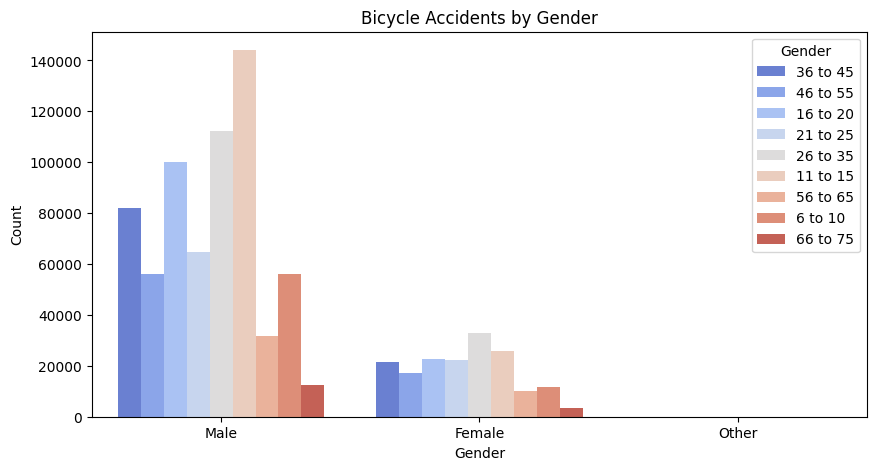

In [ ]:
# Gender Distribution Plots
plt.figure(figsize=(10, 5))
sns.countplot(data=bikers, x='Gender', hue='Age_Grp', palette='coolwarm')
plt.title('Bicycle Accidents by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

<Figure size 1200x600 with 0 Axes>

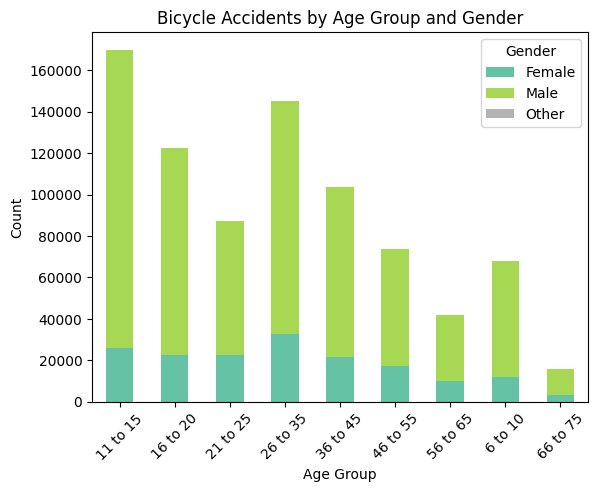

In [ ]:
# Age Group Analysis
plt.figure(figsize=(12, 6))
age_group_counts = bikers.groupby('Age_Grp')['Gender'].value_counts().unstack()
age_group_counts.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Bicycle Accidents by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

C:\Users\Chris\AppData\Local\Temp\ipykernel_22068\1404353545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bikers, x='Severity', palette='magma')


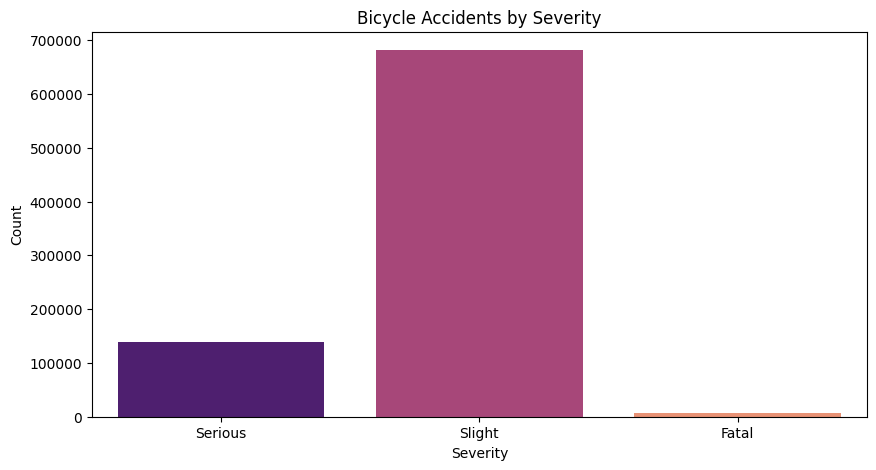

In [ ]:
# Accident Severity Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=bikers, x='Severity', palette='magma')
plt.title('Bicycle Accidents by Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

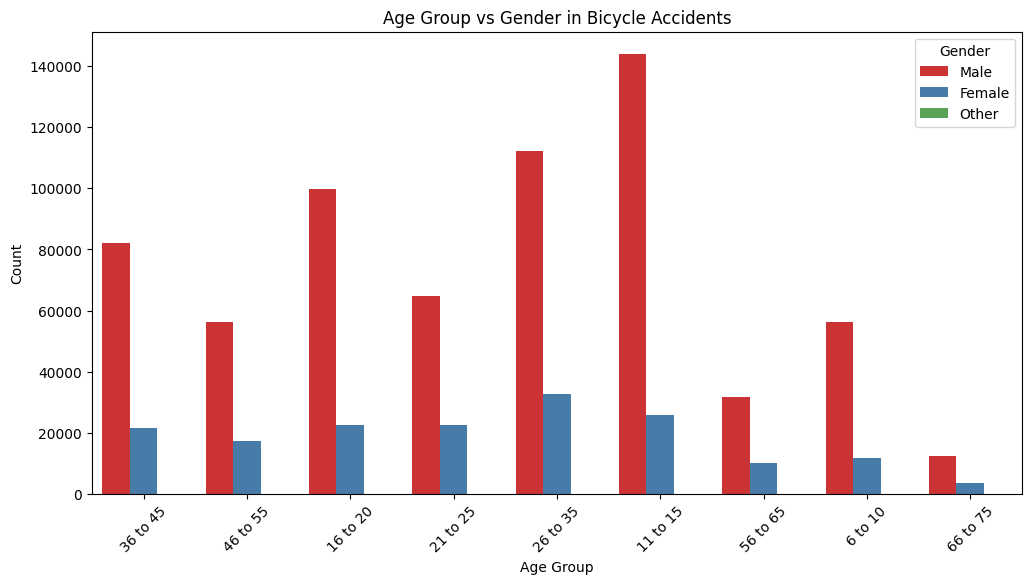

In [ ]:
# Age Group vs Gender in Bicycle Accidents (Previously Plotly, Now Seaborn)
plt.figure(figsize=(12, 6))
sns.countplot(data=bikers, x='Age_Grp', hue='Gender', palette='Set1')
plt.title('Age Group vs Gender in Bicycle Accidents')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

In [ ]:
bikers.columns

Index(['Accident_Index', 'Gender', 'Severity', 'Age_Grp'], dtype='object')

In [ ]:
bike_accidents.columns

Index(['Accident_Index', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date',
       'Time', 'Speed_limit', 'Road_conditions', 'Weather_conditions', 'Day',
       'Road_type', 'Light_conditions', 'Hour'],
      dtype='object')

In [ ]:
### Merge the two datasets

In [ ]:

# Combine two Datasets (bike_accidents and bikers)
full_df = bike_accidents.merge(bikers, on='Accident_Index', how='left')


In [ ]:
# Accidents Date and Time
## Average accidents by year
full_df['Date'] = pd.to_datetime(full_df['Date'])
full_df['Year'] = full_df['Date'].dt.year

In [ ]:
avg_accidents_by_year = (
    full_df.groupby(['Date', 'Year'])
    .size()
    .reset_index(name='count')
    .groupby('Year')
    .agg({'count': 'mean'})
    .rename(columns={'count': 'avg'})
    .reset_index()
    .sort_values(by='avg', ascending=False)
)

In [ ]:
avg_accidents_by_year.head()

,Year,avg
5,1984,80.467213
4,1983,79.950685
10,1989,74.136986
3,1982,73.608219
6,1985,70.219178


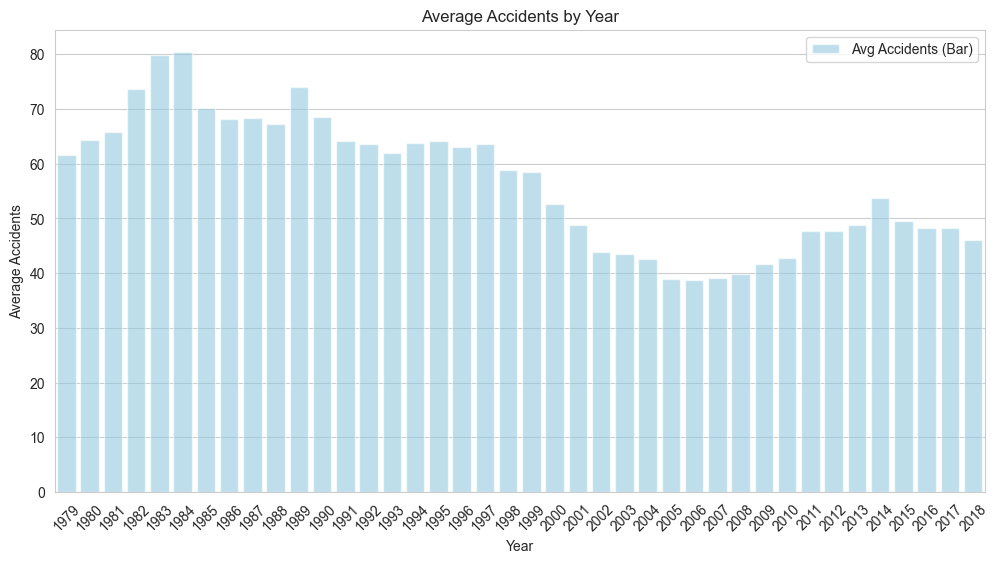

In [ ]:

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Bar chart
sns.barplot(x="Year", y="avg", data=avg_accidents_by_year, color="skyblue", alpha=0.6, label="Avg Accidents (Bar)")

# Line chart
#sns.lineplot(x="Year", y="Avg_Accidents", data=df, marker="o", color="b", label="Avg Accidents (Line)")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Average Accidents")
plt.title("Average Accidents by Year")
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.show()

In [ ]:
full_df.head()

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Hour,Gender,Severity,Age_Grp,Year
0,197901A1SEE71,2,1,1979-01-01,1900-01-01 18:20:00,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit,18,Male,Serious,36 to 45,1979
1,197901A2JDW40,1,1,1979-02-01,1900-01-01 09:15:00,30.0,Snow,Unknown,Tuesday,Unknown,Daylight,9,Male,Slight,46 to 55,1979
2,197901A4IJV90,2,1,1979-04-01,1900-01-01 08:45:00,30.0,Snow,Unknown,Thursday,Unknown,Daylight,8,Male,Slight,46 to 55,1979
3,197901A4NIE33,2,1,1979-04-01,1900-01-01 13:40:00,30.0,Wet,Unknown,Thursday,Unknown,Daylight,13,Male,Slight,36 to 45,1979
4,197901A4SKO47,2,1,1979-04-01,1900-01-01 18:50:00,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit,18,Male,Slight,46 to 55,1979


In [ ]:

# Accidents by year and month
full_df['Month'] = full_df['Date'].dt.month_name()
acc_year_month = (
    full_df.groupby(['Year', 'Month'])
    .size()
    .reset_index(name='count')
    .sort_values(by=['Year', 'Month'])
)

NameError: name 'full_df' is not defined

In [ ]:
# Plot Accidents by year and month
plt.figure(figsize=(12, 6))
sns.lineplot(data=acc_year_month, x='month', y='count', hue='year', marker='o')
plt.title("Number of Accidents by Season")
plt.xlabel("Month")
plt.ylabel("Counts")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Accidents by Time
full_df['time'] = pd.to_datetime(full_df['time'], format='%H:%M:%S').dt.floor('H')
accidents_by_time = (
    full_df.groupby('time')
    .size()
    .reset_index(name='counts')
    .sort_values(by='time')
)

In [ ]:
# Accidents by Weekday
full_df['weekday'] = full_df['date'].dt.day_name()
accidents_by_weekday = (
    full_df.groupby('weekday')
    .size()
    .reset_index(name='counts')
)
accidents_by_weekday['percent'] = (accidents_by_weekday['counts'] / accidents_by_weekday['counts'].sum()) * 100
accidents_by_weekday['label'] = accidents_by_weekday['percent'].round(0).astype(int).astype(str) + "%"

In [ ]:
# Plot Accidents by Time
plt.figure(figsize=(10, 5))
sns.lineplot(data=accidents_by_time, x='time', y='counts', marker='o', color='steelblue')
plt.title("Accidents by Time")
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Plot Average Accidents by Year
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_accidents_by_year, x='year', y='avg', marker='o', color='darkgreen')
plt.title("Average Accidents by Year")
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [ ]:
# Plot Accidents by Weekday
plt.figure(figsize=(10, 5))
sns.barplot(data=accidents_by_weekday, x='weekday', y='counts', color='#204338')
for i, row in accidents_by_weekday.iterrows():
    plt.text(i, row['counts'], row['label'], ha='center', va='bottom', color='white', fontweight='bold')
plt.title("Accidents by Weekday")
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [ ]:
# Convert time column to datetime and group by hour for weekdays
full_df['time'] = pd.to_datetime(full_df['time'], format='%H:%M:%S')
full_df['hour'] = full_df['time'].dt.floor('H')

In [ ]:
# Weekdays data
fss_by_weekdays = (full_df[~full_df['day'].isin(['Saturday', 'Sunday'])]
                   .groupby('hour')
                   .size()
                   .reset_index(name='counts'))
fss_by_weekdays['percent_time'] = fss_by_weekdays['counts'] / fss_by_weekdays['counts'].sum() * 100

In [ ]:
# Sunday data
fss_sunday = (full_df[full_df['day'] == 'Sunday']
              .groupby('hour')
              .size()
              .reset_index(name='counts'))
fss_sunday['percent_sunday'] = fss_sunday['counts'] / fss_sunday['counts'].sum() * 10

In [ ]:
# Saturday data
fss_saturday = (full_df[full_df['day'] == 'Saturday']
                .groupby('hour')
                .size()
                .reset_index(name='counts'))
fss_saturday['percent_saturday'] = fss_saturday['counts'] / fss_saturday['counts'].sum() * 100

In [ ]:

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=fss_by_weekdays['hour'], y=fss_by_weekdays['percent_time'], label='Weekdays', color='#B7262D', linewidth=2)
sns.lineplot(x=fss_sunday['hour'], y=fss_sunday['percent_sunday'], label='Sunday', color='#FDAF01', linestyle='dashed', linewidth=2)
sns.lineplot(x=fss_saturday['hour'], y=fss_saturday['percent_saturday'], label='Saturday', color='#0E1856', linestyle='dashed', linewidth=2)

plt.title('Average Accidents Time')
plt.xlabel('Time of Day')
plt.ylabel('Total FSS')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
# Severity 2000-2018
severity_summary = (full_df.groupby(['severity', full_df['date'].dt.year])
                    .size()
                    .reset_index(name='counts')
                    .pivot(index='date', columns='severity', values='counts')
                    .fillna(0))
severity_summary['Total'] = severity_summary.sum(axis=1)
severity_summary = severity_summary[severity_summary.index >= 2000]
print(severity_summary)

In [ ]:
# Severity by weather conditions
severity_weather_condition = (full_df.dropna(subset=['weather_conditions'])
                              .groupby(['severity', 'weather_conditions'])
                              .size()
                              .reset_index(name='counts'))
severity_weather_condition['percent'] = round(severity_weather_condition['counts'] / severity_weather_condition['counts'].sum() * 100, 1)
severity_weather_condition = severity_weather_condition[severity_weather_condition['percent'] > 0]
print(severity_weather_condition.sort_values(by='counts', ascending=False))

In [ ]:
# Severity by light conditions
severity_light_condition = (full_df.groupby(['severity', 'light_conditions'])
                            .size()
                            .reset_index(name='counts'))
severity_light_condition['percent'] = round(severity_light_condition['counts'] / severity_light_condition['counts'].sum() * 100, 1)
severity_light_condition = severity_light_condition[severity_light_condition['percent'] > 0]
print(severity_light_condition.sort_values(by='counts', ascending=False))

In [ ]:
# Severity by speed limit
severity_by_speedlimit = (full_df.groupby(['severity', 'speed_limit'])
                          .size()
                          .reset_index(name='counts'))
severity_by_speedlimit['percent'] = round(severity_by_speedlimit['counts'] / severity_by_speedlimit['counts'].sum() * 100, 1)
severity_by_speedlimit = severity_by_speedlimit[severity_by_speedlimit['percent'] > 0]
print(severity_by_speedlimit.sort_values(by='counts', ascending=False))


In [ ]:
# Index of bicycle accidents by severity 1979-2018
def calculate_index(full_df, severity):
    df = (full_df[full_df['severity'] == severity]
          .groupby(full_df['date'].dt.year)
          .size()
          .reset_index(name='counts'))
    df['index'] = (df['counts'] / df['counts'].iloc[0]) * 100
    return df

In [ ]:
index_fatal = calculate_index(full_df, 'Fatal')
index_slight = calculate_index(full_df, 'Slight')
index_serious = calculate_index(full_df, 'Serious')

In [ ]:
# Combine indexes
data_prep = pd.concat([index_fatal, index_slight, index_serious])
data_prep['index'] = data_prep['index'].round(0)
print(data_prep)